In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from io import StringIO
from typing import Callable

import pandas as pd
import plotnine as gg

In [3]:
from speclet.plot.plotnine_helpers import set_gg_theme

In [4]:
_ = gg.theme_set(gg.theme_minimal())

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [6]:
log_outputs = [
    """
2022-01-29 09:56:46.616176, chain=0, draw=0, tune, divergences=0
2022-01-29 10:01:01.333800, chain=0, draw=5, tune, divergences=0
2022-01-29 10:20:14.489366, chain=0, draw=10, tune, divergences=0
2022-01-29 10:39:36.366664, chain=0, draw=15, tune, divergences=0
2022-01-29 11:41:50.989932, chain=0, draw=20, tune, divergences=0
2022-01-29 12:59:34.281516, chain=0, draw=25, tune, divergences=0
2022-01-29 14:17:25.859380, chain=0, draw=30, tune, divergences=0
2022-01-29 15:35:13.632486, chain=0, draw=35, tune, divergences=0
2022-01-29 16:52:28.580817, chain=0, draw=40, tune, divergences=0
2022-01-29 17:53:36.807962, chain=0, draw=45, tune, divergences=0
2022-01-29 19:09:31.289808, chain=0, draw=50, tune, divergences=0
2022-01-29 20:24:44.046637, chain=0, draw=55, tune, divergences=0
2022-01-29 21:37:13.121853, chain=0, draw=60, tune, divergences=0
2022-01-29 22:54:15.268314, chain=0, draw=65, tune, divergences=0
2022-01-30 00:12:13.931079, chain=0, draw=70, tune, divergences=0
2022-01-30 01:30:31.800116, chain=0, draw=75, tune, divergences=0
2022-01-30 02:49:01.613920, chain=0, draw=80, tune, divergences=0
2022-01-30 04:07:29.308290, chain=0, draw=85, tune, divergences=0
2022-01-30 05:25:59.078940, chain=0, draw=90, tune, divergences=0
2022-01-30 06:44:29.825649, chain=0, draw=95, tune, divergences=0
2022-01-30 08:03:05.945938, chain=0, draw=100, tune, divergences=0
2022-01-30 09:21:40.753070, chain=0, draw=105, tune, divergences=0
2022-01-30 10:40:24.982823, chain=0, draw=110, tune, divergences=0
2022-01-30 11:59:19.186929, chain=0, draw=115, tune, divergences=0
2022-01-30 13:18:16.097970, chain=0, draw=120, tune, divergences=0
2022-01-30 14:37:13.572514, chain=0, draw=125, tune, divergences=0
2022-01-30 15:55:58.731032, chain=0, draw=130, tune, divergences=0
2022-01-30 17:14:50.868777, chain=0, draw=135, tune, divergences=0
2022-01-30 18:33:21.273562, chain=0, draw=140, tune, divergences=0
2022-01-30 19:51:21.156879, chain=0, draw=145, tune, divergences=0
2022-01-30 21:09:55.879991, chain=0, draw=150, tune, divergences=0
2022-01-30 22:28:49.902466, chain=0, draw=155, tune, divergences=0
2022-01-30 23:47:45.511436, chain=0, draw=160, tune, divergences=0
2022-01-31 01:06:44.767011, chain=0, draw=165, tune, divergences=0
2022-01-31 02:25:46.884747, chain=0, draw=170, tune, divergences=0
2022-01-31 03:44:54.254490, chain=0, draw=175, tune, divergences=0
2022-01-31 05:04:02.127802, chain=0, draw=180, tune, divergences=0
2022-01-31 06:23:10.802938, chain=0, draw=185, tune, divergences=0
2022-01-31 07:41:59.048026, chain=0, draw=190, tune, divergences=0
2022-01-31 09:00:41.648944, chain=0, draw=195, tune, divergences=0
    """,
    """
2022-01-29 09:55:58.321164, chain=0, draw=0, tune, divergences=0
2022-01-29 09:57:24.204602, chain=0, draw=5, tune, divergences=0
2022-01-29 10:10:07.189816, chain=0, draw=10, tune, divergences=0
2022-01-29 11:25:19.261288, chain=0, draw=15, tune, divergences=0
2022-01-29 12:40:51.155295, chain=0, draw=20, tune, divergences=0
2022-01-29 13:55:23.330132, chain=0, draw=25, tune, divergences=0
2022-01-29 14:41:21.168652, chain=0, draw=30, tune, divergences=0
2022-01-29 15:57:04.873360, chain=0, draw=35, tune, divergences=0
2022-01-29 17:13:09.870394, chain=0, draw=40, tune, divergences=0
2022-01-29 18:29:28.040082, chain=0, draw=45, tune, divergences=0
2022-01-29 19:46:12.446821, chain=0, draw=50, tune, divergences=0
2022-01-29 21:02:53.213091, chain=0, draw=55, tune, divergences=0
2022-01-29 22:19:34.783275, chain=0, draw=60, tune, divergences=0
2022-01-29 23:36:10.476235, chain=0, draw=65, tune, divergences=0
2022-01-30 00:52:39.626416, chain=0, draw=70, tune, divergences=0
2022-01-30 02:09:16.372180, chain=0, draw=75, tune, divergences=0
2022-01-30 03:25:35.271547, chain=0, draw=80, tune, divergences=0
2022-01-30 04:40:42.938760, chain=0, draw=85, tune, divergences=0
2022-01-30 05:55:53.448790, chain=0, draw=90, tune, divergences=0
2022-01-30 07:11:27.621509, chain=0, draw=95, tune, divergences=0
2022-01-30 08:26:50.796059, chain=0, draw=100, tune, divergences=0
2022-01-30 09:42:32.090982, chain=0, draw=105, tune, divergences=0
2022-01-30 10:58:24.905918, chain=0, draw=110, tune, divergences=0
2022-01-30 12:14:29.412061, chain=0, draw=115, tune, divergences=0
2022-01-30 13:30:27.932556, chain=0, draw=120, tune, divergences=0
2022-01-30 14:46:45.396402, chain=0, draw=125, tune, divergences=0
2022-01-30 16:03:27.126804, chain=0, draw=130, tune, divergences=0
2022-01-30 17:20:20.398780, chain=0, draw=135, tune, divergences=0
2022-01-30 18:36:42.710945, chain=0, draw=140, tune, divergences=0
2022-01-30 19:53:13.652882, chain=0, draw=145, tune, divergences=0
2022-01-30 21:09:54.608018, chain=0, draw=150, tune, divergences=0
2022-01-30 22:26:28.263823, chain=0, draw=155, tune, divergences=0
2022-01-30 23:43:09.444228, chain=0, draw=160, tune, divergences=0
2022-01-31 00:59:54.900072, chain=0, draw=165, tune, divergences=0
2022-01-31 02:16:27.990117, chain=0, draw=170, tune, divergences=0
2022-01-31 03:33:13.361332, chain=0, draw=175, tune, divergences=0
2022-01-31 04:50:06.542673, chain=0, draw=180, tune, divergences=0
2022-01-31 06:06:59.634657, chain=0, draw=185, tune, divergences=0
2022-01-31 07:23:57.139193, chain=0, draw=190, tune, divergences=0
2022-01-31 08:40:49.563344, chain=0, draw=195, tune, divergences=0
    """,
    """
2022-01-29 09:56:19.317361, chain=0, draw=0, tune, divergences=0
2022-01-29 09:59:36.944161, chain=0, draw=5, tune, divergences=0
2022-01-29 10:26:32.155602, chain=0, draw=10, tune, divergences=0
2022-01-29 11:35:16.885325, chain=0, draw=15, tune, divergences=0
2022-01-29 12:51:31.095785, chain=0, draw=20, tune, divergences=0
2022-01-29 14:07:48.219661, chain=0, draw=25, tune, divergences=0
2022-01-29 15:24:01.070439, chain=0, draw=30, tune, divergences=0
2022-01-29 16:40:17.012919, chain=0, draw=35, tune, divergences=0
2022-01-29 17:55:57.685148, chain=0, draw=40, tune, divergences=0
2022-01-29 19:10:46.631082, chain=0, draw=45, tune, divergences=0
2022-01-29 20:12:09.632493, chain=0, draw=50, tune, divergences=0
2022-01-29 21:29:10.921021, chain=0, draw=55, tune, divergences=0
2022-01-29 22:46:38.374990, chain=0, draw=60, tune, divergences=0
2022-01-30 00:04:18.964035, chain=0, draw=65, tune, divergences=0
2022-01-30 01:22:02.952790, chain=0, draw=70, tune, divergences=0
2022-01-30 02:39:54.211956, chain=0, draw=75, tune, divergences=0
2022-01-30 03:57:23.972553, chain=0, draw=80, tune, divergences=0
2022-01-30 05:14:50.899159, chain=0, draw=85, tune, divergences=0
2022-01-30 06:32:18.517909, chain=0, draw=90, tune, divergences=0
2022-01-30 07:49:58.119382, chain=0, draw=95, tune, divergences=0
2022-01-30 09:07:30.596713, chain=0, draw=100, tune, divergences=0
2022-01-30 10:25:10.781321, chain=0, draw=105, tune, divergences=0
2022-01-30 11:42:56.468029, chain=0, draw=110, tune, divergences=0
2022-01-30 13:00:45.090657, chain=0, draw=115, tune, divergences=0
2022-01-30 14:18:27.069994, chain=0, draw=120, tune, divergences=0
2022-01-30 15:37:25.247677, chain=0, draw=125, tune, divergences=0
2022-01-30 16:57:03.491222, chain=0, draw=130, tune, divergences=0
2022-01-30 18:15:38.610532, chain=0, draw=135, tune, divergences=0
2022-01-30 19:34:15.675337, chain=0, draw=140, tune, divergences=0
2022-01-30 20:52:53.951581, chain=0, draw=145, tune, divergences=0
2022-01-30 22:11:18.155508, chain=0, draw=150, tune, divergences=0
2022-01-30 23:29:49.791861, chain=0, draw=155, tune, divergences=0
2022-01-31 00:48:07.176420, chain=0, draw=160, tune, divergences=0
2022-01-31 02:06:24.826704, chain=0, draw=165, tune, divergences=0
2022-01-31 03:24:42.718024, chain=0, draw=170, tune, divergences=0
2022-01-31 04:43:17.966982, chain=0, draw=175, tune, divergences=0
2022-01-31 06:01:59.290528, chain=0, draw=180, tune, divergences=0
2022-01-31 07:20:33.426417, chain=0, draw=185, tune, divergences=0
2022-01-31 08:38:37.809852, chain=0, draw=190, tune, divergences=0
    """,
    """
2022-01-29 09:56:11.252154, chain=0, draw=0, tune, divergences=0
2022-01-29 10:04:03.994320, chain=0, draw=5, tune, divergences=0
2022-01-29 11:19:12.094968, chain=0, draw=10, tune, divergences=0
2022-01-29 12:34:12.474045, chain=0, draw=15, tune, divergences=0
2022-01-29 13:49:30.452066, chain=0, draw=20, tune, divergences=0
2022-01-29 15:04:33.045384, chain=0, draw=25, tune, divergences=0
2022-01-29 16:19:41.592732, chain=0, draw=30, tune, divergences=0
2022-01-29 17:34:40.222028, chain=0, draw=35, tune, divergences=0
2022-01-29 18:49:00.581173, chain=0, draw=40, tune, divergences=0
2022-01-29 20:03:01.953878, chain=0, draw=45, tune, divergences=0
2022-01-29 21:00:03.515235, chain=0, draw=50, tune, divergences=0
2022-01-29 22:15:08.642585, chain=0, draw=55, tune, divergences=0
2022-01-29 23:30:31.706436, chain=0, draw=60, tune, divergences=0
2022-01-30 00:46:56.631776, chain=0, draw=65, tune, divergences=0
2022-01-30 02:03:30.353152, chain=0, draw=70, tune, divergences=0
2022-01-30 03:19:53.896207, chain=0, draw=75, tune, divergences=0
2022-01-30 04:36:08.410929, chain=0, draw=80, tune, divergences=0
2022-01-30 05:52:21.718923, chain=0, draw=85, tune, divergences=0
2022-01-30 07:09:08.624187, chain=0, draw=90, tune, divergences=0
2022-01-30 08:25:21.631286, chain=0, draw=95, tune, divergences=0
2022-01-30 09:41:58.917564, chain=0, draw=100, tune, divergences=0
2022-01-30 10:58:30.078063, chain=0, draw=105, tune, divergences=0
2022-01-30 12:15:11.050451, chain=0, draw=110, tune, divergences=0
2022-01-30 13:31:56.363181, chain=0, draw=115, tune, divergences=0
2022-01-30 14:48:48.284309, chain=0, draw=120, tune, divergences=0
2022-01-30 16:06:51.499909, chain=0, draw=125, tune, divergences=0
2022-01-30 17:25:00.484778, chain=0, draw=130, tune, divergences=0
2022-01-30 18:42:00.223496, chain=0, draw=135, tune, divergences=0
2022-01-30 19:59:34.274528, chain=0, draw=140, tune, divergences=0
2022-01-30 21:16:46.750924, chain=0, draw=145, tune, divergences=0
2022-01-30 22:34:06.748221, chain=0, draw=150, tune, divergences=0
2022-01-30 23:51:19.553438, chain=0, draw=155, tune, divergences=0
2022-01-31 01:08:17.181589, chain=0, draw=160, tune, divergences=0
2022-01-31 02:25:37.299083, chain=0, draw=165, tune, divergences=0
2022-01-31 03:42:51.277834, chain=0, draw=170, tune, divergences=0
2022-01-31 05:00:05.144134, chain=0, draw=175, tune, divergences=0
2022-01-31 06:17:54.757476, chain=0, draw=180, tune, divergences=0
2022-01-31 07:34:46.181634, chain=0, draw=185, tune, divergences=0
2022-01-31 08:51:37.308714, chain=0, draw=190, tune, divergences=0
    """,
]

In [7]:
def _remove_prefix(col: pd.Series, prefix: str) -> list[str]:
    return [x.replace(prefix, "") for x in col]


def log_to_df(log_txt: str) -> pd.DataFrame:
    log_data = (
        pd.read_csv(
            StringIO(log_txt),
            sep=",",
            header=None,
            names=["time", "chain", "draw", "tune", "num_divergences"],
            parse_dates=["time"],
        )
        .assign(
            chain=lambda d: _remove_prefix(d["chain"], "chain="),
            draw=lambda d: _remove_prefix(d["draw"], "draw="),
            num_divergences=lambda d: _remove_prefix(
                d["num_divergences"], "divergences="
            ),
        )
        .astype({"chain": int, "draw": int, "num_divergences": int})
    )
    return log_data


log_data = pd.concat(
    [log_to_df(txt).assign(chain=i) for i, txt in enumerate(log_outputs)]
).reset_index(drop=True)
log_data.head()

,time,chain,draw,tune,num_divergences
0,2022-01-29 09:56:46.616176,0,0,tune,0
1,2022-01-29 10:01:01.333800,0,5,tune,0
2,2022-01-29 10:20:14.489366,0,10,tune,0
3,2022-01-29 10:39:36.366664,0,15,tune,0
4,2022-01-29 11:41:50.989932,0,20,tune,0


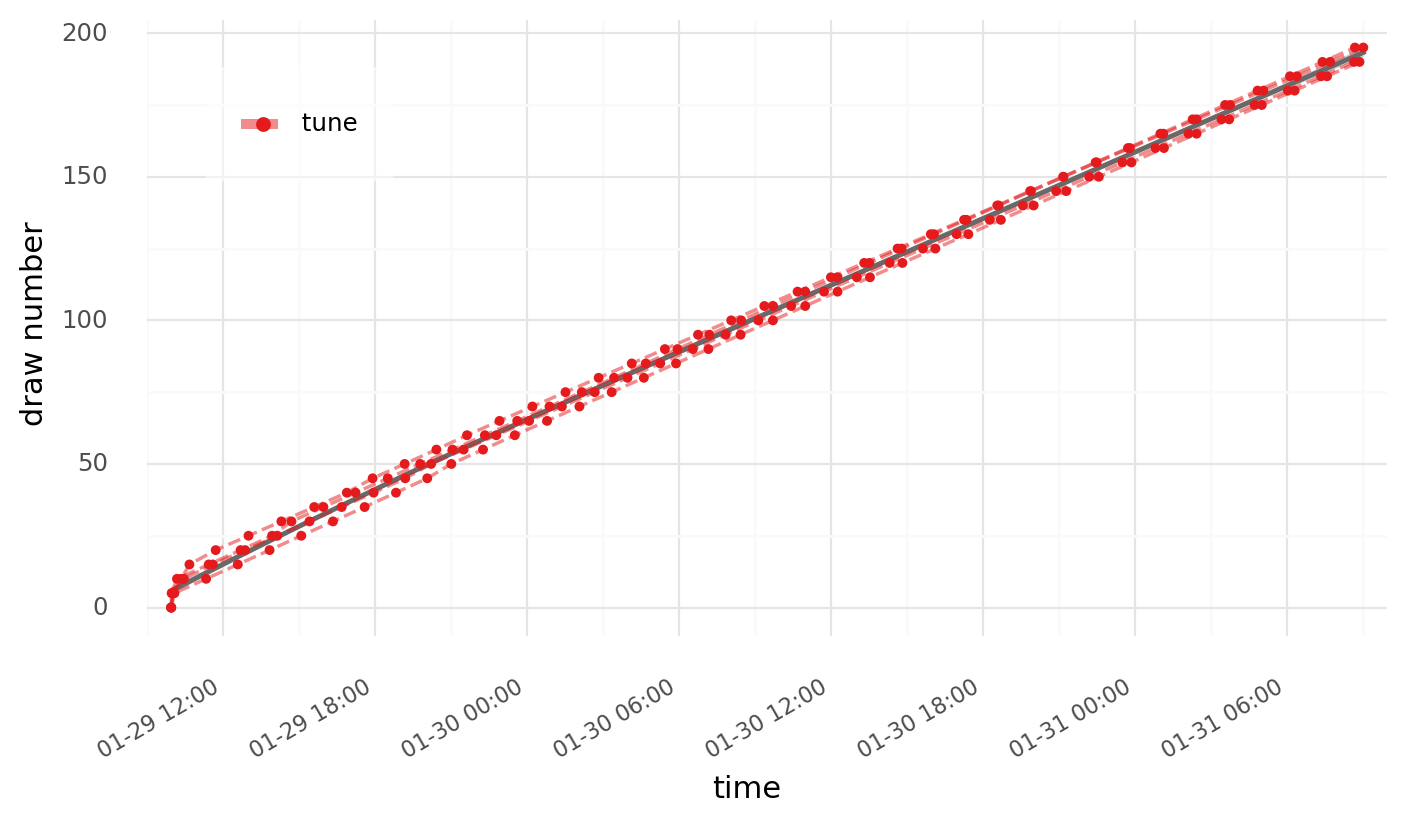

<ggplot: (337238583)>

In [8]:
date_fmt = "%m-%d %H:%M"
(
    gg.ggplot(log_data, gg.aes(x="time", y="draw"))
    + gg.geom_smooth(method="loess", color="dimgray", linetype="-", alpha=0.5, size=1)
    + gg.geom_line(
        gg.aes(group="chain", color="tune"), alpha=0.5, size=0.7, linetype="--"
    )
    + gg.geom_point(gg.aes(color="tune"), size=1)
    + gg.scale_x_datetime(expand=(0.02, 0), date_labels=date_fmt)
    + gg.scale_color_brewer(
        type="qual", palette="Set1", guide=gg.guide_legend(override_aes={"size": 2})
    )
    + gg.theme(
        figure_size=(8, 4),
        legend_position=(0.22, 0.75),
        legend_background=gg.element_rect(alpha=0.5, size=0, color="white"),
        legend_title=gg.element_blank(),
        axis_text_x=gg.element_text(size=8, angle=30, hjust=1),
    )
    + gg.labs(x="time", y="draw number")
)

In [9]:
def calc_durations(log_df: pd.DataFrame) -> pd.DataFrame:
    durations = log_df["time"].values[1:] - log_df["time"].values[:-1]
    draw_interval = log_df["draw"].values[1:] - log_df["draw"].values[:-1]
    draw_durations = (
        pd.DataFrame(
            {
                "duration": durations,
                "draw_interval": draw_interval,
                "draw": log_df["draw"][1:],
            }
        )
        .merge(log_df.drop(columns=["time"]), on="draw", how="left")
        .assign(time_per_draw=lambda d: d.duration / d.draw_interval)
    )
    return draw_durations


draw_durations = log_data.groupby("chain").apply(calc_durations).reset_index(drop=True)
draw_durations.head()

,duration,draw_interval,draw,chain,tune,num_divergences,time_per_draw
0,0 days 00:04:14.717624,5,5,0,tune,0,0 days 00:00:50.943524800
1,0 days 00:19:13.155566,5,10,0,tune,0,0 days 00:03:50.631113200
2,0 days 00:19:21.877298,5,15,0,tune,0,0 days 00:03:52.375459600
3,0 days 01:02:14.623268,5,20,0,tune,0,0 days 00:12:26.924653600
4,0 days 01:17:43.291584,5,25,0,tune,0,0 days 00:15:32.658316800


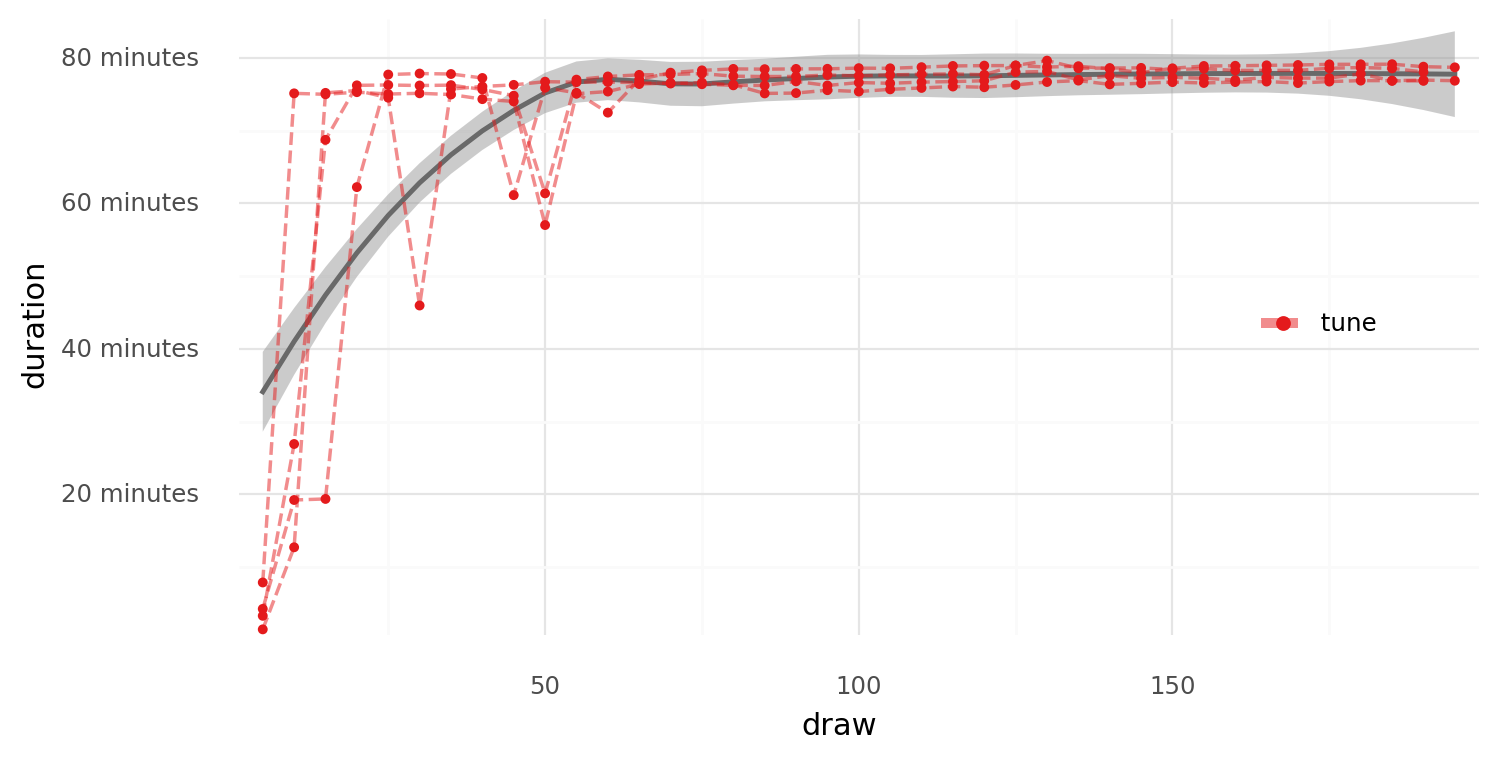

<ggplot: (337404320)>

In [10]:
(
    gg.ggplot(draw_durations, gg.aes(x="draw", y="duration"))
    + gg.geom_smooth(method="loess", color="dimgray", linetype="-", alpha=0.5, size=1)
    + gg.geom_line(
        gg.aes(group="chain", color="tune"), alpha=0.5, size=0.7, linetype="--"
    )
    + gg.geom_point(gg.aes(color="tune"), size=1)
    + gg.scale_x_continuous(expand=(0.02, 0.02))
    + gg.scale_y_timedelta(expand=(0.01, 0, 0.02, 0))
    + gg.scale_color_brewer(
        type="qual", palette="Set1", guide=gg.guide_legend(override_aes={"size": 2})
    )
    + gg.theme(
        figure_size=(8, 4), legend_position=(0.8, 0.5), legend_title=gg.element_blank()
    )
)

/usr/local/Caskroom/miniconda/base/envs/speclet/lib/python3.9/site-packages/plotnine/positions/position.py:204: PlotnineWarning: position_stack requires non-overlapping x intervals


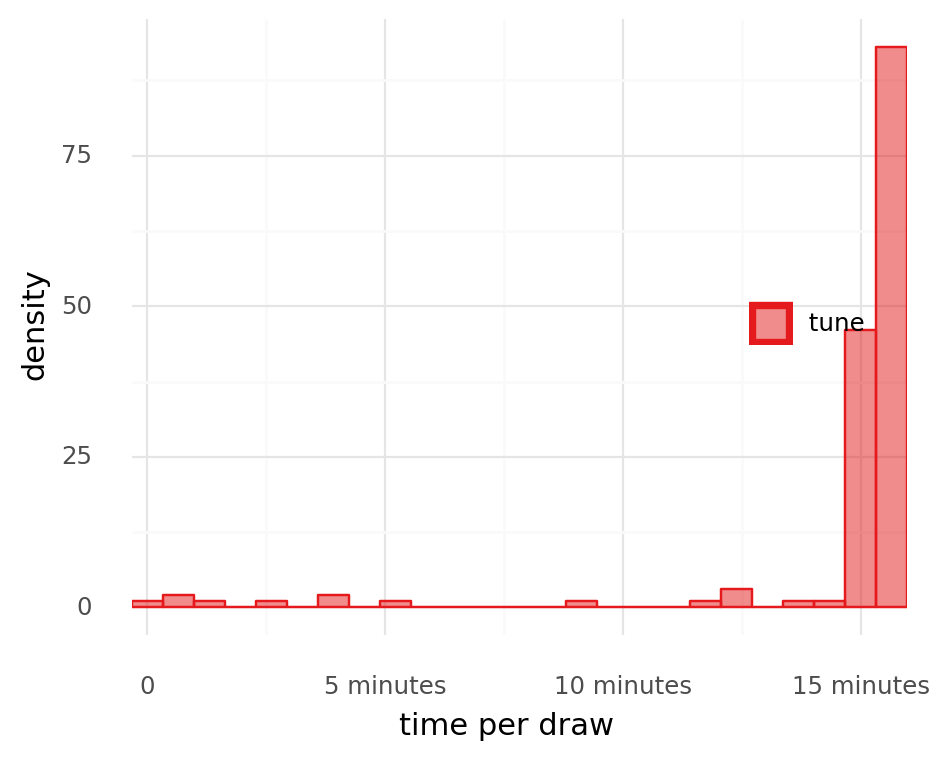

<ggplot: (337451918)>

In [11]:
(
    gg.ggplot(draw_durations, gg.aes(x="time_per_draw", color="tune", fill="tune"))
    # + gg.geom_density(size=1, alpha=0.5)
    + gg.geom_histogram(bins=25, alpha=0.5)
    + gg.scale_x_timedelta(expand=(0, 0))
    + gg.scale_color_brewer(
        type="qual", palette="Set1", guide=gg.guide_legend(override_aes={"size": 1.5})
    )
    + gg.scale_fill_brewer(type="qual", palette="Set1")
    + gg.theme(
        figure_size=(5, 4), legend_position=(0.8, 0.5), legend_title=gg.element_blank()
    )
    + gg.labs(x="time per draw", y="density")
)

In [12]:
avg_draw_rate = draw_durations["time_per_draw"].median()
n_draws = 200
pred_dur = avg_draw_rate * n_draws
pred_finish_n = pred_dur + log_data.time.min()

print(f"average draw rate:  {avg_draw_rate}")
print(f"predicted finish {n_draws} draws:  {pred_finish_n}")

average draw rate:  0 days 00:15:22.334528600
predicted finish 200 draws:  2022-01-31 13:10:25.226884
